In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:\\Users\\goktug.akca\\Desktop\\23-24 Bahar\\468\\FaceEmotionRecognition\\Data\\train'
#validation_dir = 'data/PublicTest'
test_dir ='C:\\Users\\goktug.akca\\Desktop\\23-24 Bahar\\468\\FaceEmotionRecognition\\Data\\test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48, 48),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (48, 48),
    batch_size=32
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

C:\Users\goktug.akca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581,639 (2.22 MB)

 Trainable params: 581,639 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    steps_per_epoch = 900,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=115
)

Epoch 1/30


C:\Users\goktug.akca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


896/900 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3155 - loss: 1.7226

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


900/900 ━━━━━━━━━━━━━━━━━━━━ 94s 101ms/step - accuracy: 0.3159 - loss: 1.7220 - val_accuracy: 0.4783 - val_loss: 1.3534
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.4931 - loss: 1.3316 - val_accuracy: 0.5006 - val_loss: 1.2665
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.5649 - loss: 1.1683 - val_accuracy: 0.5348 - val_loss: 1.2121
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.6057 - loss: 1.0502 - val_accuracy: 0.5535 - val_loss: 1.1671
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.6594 - loss: 0.9336 - val_accuracy: 0.5560 - val_loss: 1.2155
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.7129 - loss: 0.7932 - val_accuracy: 0.5509 - val_loss: 1.3033
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.7644 - loss: 0.6565 - val_accuracy: 0.5728 - val_loss: 1.2903
Epoch 8/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8175 - loss: 0.5174 - val_accura

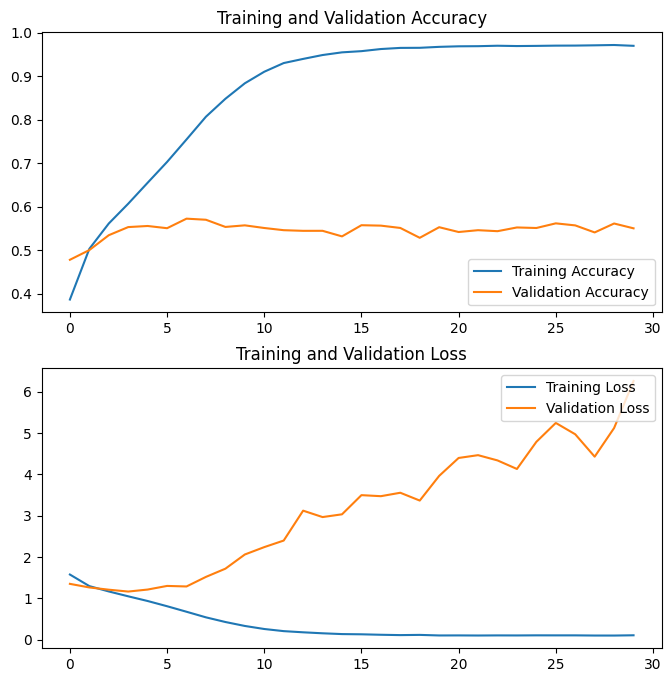

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [12]:

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(48, 48, 3))

In [13]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)


history = model.fit(train_generator, 
                              steps_per_epoch=900, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=115)

This is the number of trainable weights before freezing the conv base: 0
Epoch 1/15
898/900 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - categorical_accuracy: 0.3146 - loss: 1.7153

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


900/900 ━━━━━━━━━━━━━━━━━━━━ 159s 174ms/step - categorical_accuracy: 0.3147 - loss: 1.7152 - val_categorical_accuracy: 0.3753 - val_loss: 1.6069
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 138s 153ms/step - categorical_accuracy: 0.3866 - loss: 1.5823 - val_categorical_accuracy: 0.3871 - val_loss: 1.5620
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 149s 165ms/step - categorical_accuracy: 0.4035 - loss: 1.5506 - val_categorical_accuracy: 0.4082 - val_loss: 1.5295
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 158s 175ms/step - categorical_accuracy: 0.4167 - loss: 1.5165 - val_categorical_accuracy: 0.4034 - val_loss: 1.5184
Epoch 5/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 115s 127ms/step - categorical_accuracy: 0.4232 - loss: 1.5013 - val_categorical_accuracy: 0.4166 - val_loss: 1.5233
Epoch 6/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 94s 104ms/step - categorical_accuracy: 0.4342 - loss: 1.4887 - val_categorical_accuracy: 0.4137 - val_loss: 1.4948
Epoch 7/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 94s 104ms/step - categorical_accurac

In [17]:

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
     

In [20]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)


history = model.fit(train_generator, 
                              steps_per_epoch=900, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=115)

Epoch 1/30
898/900 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - categorical_accuracy: 0.3893 - loss: 1.6005

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


900/900 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - categorical_accuracy: 0.3893 - loss: 1.6003 - val_categorical_accuracy: 0.4785 - val_loss: 1.3660
Epoch 2/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 114s 127ms/step - categorical_accuracy: 0.5013 - loss: 1.3064 - val_categorical_accuracy: 0.5300 - val_loss: 1.2217
Epoch 3/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 116s 129ms/step - categorical_accuracy: 0.5565 - loss: 1.1723 - val_categorical_accuracy: 0.5332 - val_loss: 1.2389
Epoch 4/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 113s 126ms/step - categorical_accuracy: 0.6052 - loss: 1.0543 - val_categorical_accuracy: 0.5363 - val_loss: 1.2466
Epoch 5/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 147s 163ms/step - categorical_accuracy: 0.6562 - loss: 0.9264 - val_categorical_accuracy: 0.5671 - val_loss: 1.1987
Epoch 6/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 126s 140ms/step - categorical_accuracy: 0.7077 - loss: 0.8038 - val_categorical_accuracy: 0.5546 - val_loss: 1.3826
Epoch 7/30
900/900 ━━━━━━━━━━━━━━━━━━━━ 121s 134ms/step - categorical_accur

In [2]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined